# Project Proposal
## Project Idea
Music therapy has been shown to be a very effective means of providing therapy to patients. Many schools now have a graduate music therapy program. Throughout history there have been claims about classical music making children smarter, improving focus, and helping to calm the nerves. It would be interesting to analyze the results of this survey to see if there is any noticeable difference in results based on music genre. Particularly of interest will be classical music and its effects on survey participants. 

## Proposal
What music has the most therapeutic success. This could also be combined with the Spotify dataset to cross reference audio features, ultimately narrowing down exactly what aspects of the music are most important when it comes to music therapy. Ultimately, this data should help music therapists better select music. 

## Datasets
- [Music & Mental Health Survey](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)
- [Spotify 1.2 Million Songs](https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs)

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
survey_df = pd.read_csv('../data/raw/mxmh_survey_results.csv')

# Data Definition

In [4]:
survey_df.describe()

Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000

In [5]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

## Descriptions of Columns

- **Timestamp** - Date and time when form was submitted
- **Age** - Respondent's age
- **Primary streaming service** - Respondent's primary streaming service
- **Hours per day** - Number of hours the respondent listens to music per day
- **While working** - Does respondent listen to music while working?
- **Instrumentalist** - Does the respondent play an instrument regularly?
- **Composer** - Does the respondent compose music?
- **Fav genre** - Respondent's favorite or top genre
- **Exploratory** - Does the respondent actively explore new artists/genres?
- **Foreign languages** - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- **BPM** - Beats per minute of favorite genre
- **Frequency (Genre)** - How frequently does the respondent listen to the Genre?
- **Anxiety** - Self reported anxiety on a scale of 1-10
- **Depression** - Self reported depression on a scale of 1-10
- **Insomnia** - Self reported insomnia on a scale of 1-10
- **OCD** - Self reported OCD on a scale of 1-10
- **Music effects** - Does music improve/worsen respondent's mental health conditions?
- **Permission** - Permissions to publicize data

# Initial Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

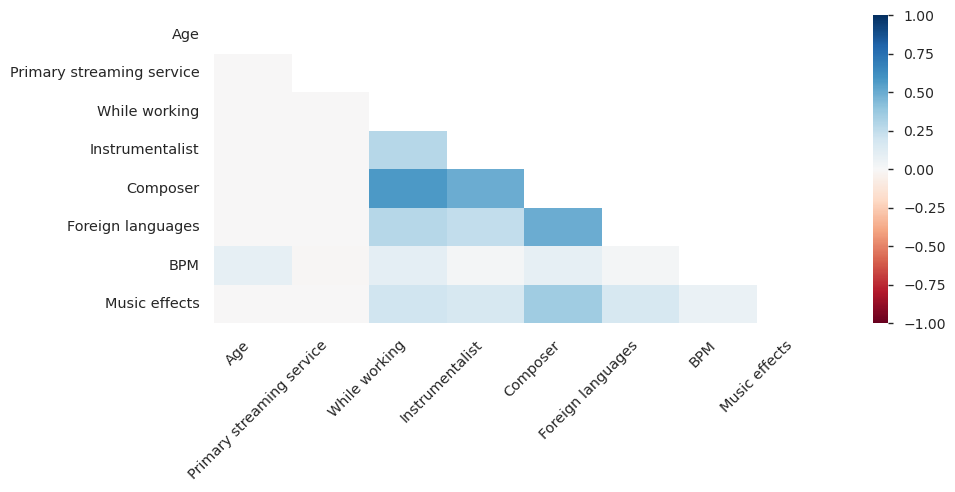

In [6]:
profile = ProfileReport(survey_df, title='Pandas Profiling Report')
profile.to_notebook_iframe()

In [7]:
survey_df.head()

Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  Very frequently            Never   
1                No  ...        Sometimes           Rarely  Very frequently   
2               Yes  ...            Never           Rarely           Rarely   
3               Yes  ...        Sometimes            Never            Never   
4                No  ...  Very frequently  Very frequently            Never   

  Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  \
0                    Sometimes     3.0        0.0      1.0  0.0           NaN   
1                       Rarely     7.0        2.0      2.0  1.0           NaN   
2              Very frequently     7.0        7.0     10.0  2.0     No effect   
3                        Never     9.0        7.0      3.0  3.0       Improve   
4                       Rarely     7.0        2.0      5.0  9.0       Improve   

     Permissions  
0  I understand.  
1  I understand.  
2  I understand.  
3  I understand.  
4  I understand.  

[5 rows x 33 columns]

In [8]:
survey_df.groupby('Music effects').count()

Timestamp  Age  Primary streaming service  Hours per day  \
Music effects                                                             
Improve              542  541                        541            542   
No effect            169  169                        169            169   
Worsen                17   17                         17             17   

               While working  Instrumentalist  Composer  Fav genre  \
Music effects                                                        
Improve                  541              540       542        542   
No effect                168              168       169        169   
Worsen                    17               17        17         17   

               Exploratory  Foreign languages  ...  Frequency [Pop]  \
Music effects                                  ...                    
Improve                542                540  ...              542   
No effect              169                168  ...              169   
Worsen                  17                 17  ...               17   

               Frequency [R&B]  Frequency [Rap]  Frequency [Rock]  \
Music effects                                                       
Improve                    542              542               542   
No effect                  169              169               169   
Worsen                      17               17                17   

               Frequency [Video game music]  Anxiety  Depression  Insomnia  \
Music effects                                                                
Improve                                 542      542         542       542   
No effect                               169      169         169       169   
Worsen                                   17       17          17        17   

               OCD  Permissions  
Music effects                    
Improve        542          542  
No effect      169          169  
Worsen          17           17  

[3 rows x 32 columns]

## Data Definition Conclusions

### Data Types
Columns with incorrect data type:
- Timestamp - should be `DateTime`
- Age - should be `int`
- While working, Instrumentalist, Composer, Exploratory, and Foreign langagues - should be `bool` because responses are either 'Yes' or 'No'
- Frequency (Genre) - should be `category` because respondent's respond on a scale of 'Never' to 'Very frequently'
- Anxiety, Depression, Insomnia, OCD - should be `category` since rated on a scale of 1-10
- Music effects - should be `category` since has three possible responses: 'Improve', 'No effect' and 'Worsen'

### Missing Values
The most significant amount of missing values occur in the 'BPM' column, 14.5%. According to the dataset, this column represents "beats per minute of favorite genre." Since respondents filled out this survey, it's difficult to imagine them knowing what number to input for the BPM, which may explain the high quantity of missing values. This can be imputed using the Spotify dataset and using either the mean or median BPM of each genre.

Other columns with missing values:
- Age
- Primary streaming service
- While working
- Instrumentalist
- Composer
- Foreign Languages
- Music effects

### Unique Value Inconsistencies
- Anxiety, Depression, OCD, and Insomnia should have 11 unique values, since rated on a scale of 1-10. This is not the case however.
  - Some users submitted decimal values, which could either be rounded up or down.

### Correlations
- Those who frequently listen to Hip Hop also frequently listen to Rap
- Those self-scoring high in Anxiety also self-score high in Depression
- Respondents tend to listen to their favorite genre most frequently
- Hours per Day has some really high numbers, like 24, which seem hard to believe

### 'Permissions' Column
This column does not provide any statistical information and can be fully dropped.

# Data Cleaning

## Datatypes

### Datetime column

In [9]:
# Create a copy of our dataset so that we don't make changes to the raw data

clean_survey_df = survey_df.copy(deep=True)
clean_survey_df['Timestamp']

0       8/27/2022 19:29:02
1       8/27/2022 19:57:31
2       8/27/2022 21:28:18
3       8/27/2022 21:40:40
4       8/27/2022 21:54:47
              ...         
731    10/30/2022 14:37:28
732     11/1/2022 22:26:42
733     11/3/2022 23:24:38
734     11/4/2022 17:31:47
735      11/9/2022 1:55:20
Name: Timestamp, Length: 736, dtype: object

In [10]:
# Convert Timestamp column to datetime and drop time since irrelevant to data

clean_survey_df['Timestamp'] = pd.to_datetime(clean_survey_df['Timestamp']).dt.normalize()

In [11]:
# Verify datatype as well as format

clean_survey_df['Timestamp']

0     2022-08-27
1     2022-08-27
2     2022-08-27
3     2022-08-27
4     2022-08-27
         ...    
731   2022-10-30
732   2022-11-01
733   2022-11-03
734   2022-11-04
735   2022-11-09
Name: Timestamp, Length: 736, dtype: datetime64[ns]

In [12]:
# Since time no longer part of the data, rename Timestamp column to Date

clean_survey_df = clean_survey_df.rename(columns={'Timestamp':'Date'})

### Age

In [13]:
clean_survey_df['Age'].dtypes

dtype('float64')

In [14]:
# Need to fill missing values before changing dtype
# Confirming there is one column with no value for Age

clean_survey_df[clean_survey_df['Age'].isna()]

Date  Age Primary streaming service  Hours per day While working  \
12 2022-08-27  NaN                   Spotify            3.0           Yes   

   Instrumentalist Composer Fav genre Exploratory Foreign languages  ...  \
12              No       No   Hip hop         Yes               Yes  ...   

    Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
12        Sometimes          Rarely           Rarely   

   Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
12                        Never     9.0        3.0      2.0  7.0   

   Music effects    Permissions  
12       Improve  I understand.  

[1 rows x 33 columns]

/home/arsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


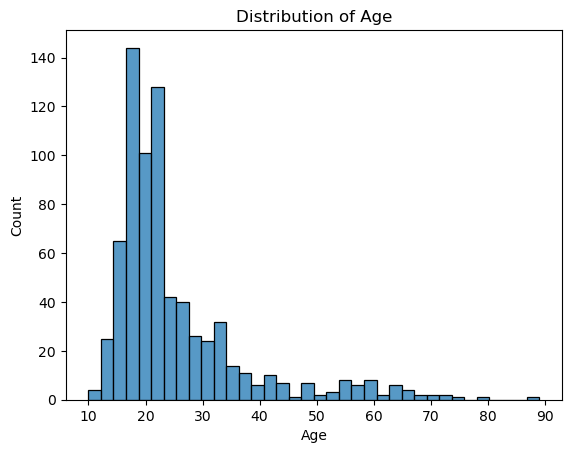

In [15]:
# Checking distribution of ages to determine whether to use mean or median to impute the value

g = sns.histplot(x='Age', data=clean_survey_df)
g.set_title(label='Distribution of Age')

plt.show()

In [16]:
# Impute the missing age using the median age since it's right-skewed

clean_survey_df['Age'] = clean_survey_df['Age'].fillna(clean_survey_df['Age'].median())

# Confirm there are no more missing values in Age

clean_survey_df['Age'].isna().sum()

0

In [17]:
# Change dtype of Age column from float to int

clean_survey_df['Age'] = clean_survey_df['Age'].astype('int')

# Confirm Age is now an int

clean_survey_df['Age'].dtypes

dtype('int64')

### While working, Instrumentalist, Composer, Exploratory, and Foreign languages

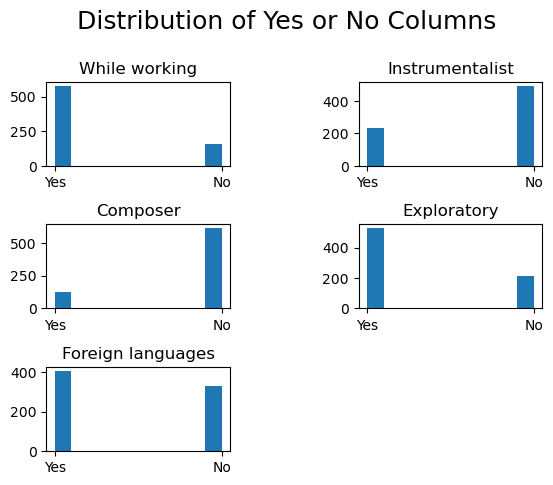

In [19]:
# Chart distributions of these columns to figure out what values to impute missing values with

column_names = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']

plt.suptitle('Distribution of Yes or No Columns', fontsize=18, y=1.03)
plt.subplots_adjust(hspace=0.7, wspace=0.7)

for i, column in enumerate(column_names):
    ax = plt.subplot(3, 2, i+1)
    clean_survey_df[column].hist(ax=ax)

    ax.set_title(column)
    ax.set_xlabel('')
    ax.grid(False)

plt.show()

In [20]:
# Impute missing values using the mode

for column in column_names:
    clean_survey_df[column] = clean_survey_df[column].fillna(clean_survey_df[column].mode().iloc[0])

# Confirm no more missing values

clean_survey_df[column_names].isna().sum()

While working        0
Instrumentalist      0
Composer             0
Exploratory          0
Foreign languages    0
dtype: int64

In [34]:
# Convert from Yes/No to bool

clean_survey_df[column_names].replace({'Yes':True, 'No':False}, inplace=True)

# Confirm type conversion

clean_survey_df[column_names].dtypes

/tmp/ipykernel_61597/3251740420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_survey_df[column_names].replace({'Yes':True, 'No':False}, inplace=True)


While working        bool
Instrumentalist      bool
Composer             bool
Exploratory          bool
Foreign languages    bool
dtype: object

### Frequency Columns

In [60]:
# Convert frequency columns to type 'category'

frequency_columns = list(clean_survey_df.columns[clean_survey_df.columns.str.startswith('Fr')])

for column in frequency_columns:
    clean_survey_df[column] = clean_survey_df[column].astype('category')

# Confirm conversion

clean_survey_df[frequency_columns].dtypes

Frequency [Classical]           category
Frequency [Country]             category
Frequency [EDM]                 category
Frequency [Folk]                category
Frequency [Gospel]              category
Frequency [Hip hop]             category
Frequency [Jazz]                category
Frequency [K pop]               category
Frequency [Latin]               category
Frequency [Lofi]                category
Frequency [Metal]               category
Frequency [Pop]                 category
Frequency [R&B]                 category
Frequency [Rap]                 category
Frequency [Rock]                category
Frequency [Video game music]    category
dtype: object

### Anxiety, Depression, OCD, and Insomnia

In [63]:
# Check data ranges, should be 11 since using scale of 0-10

columns = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
clean_survey_df[columns].nunique()

Anxiety       12
Depression    12
OCD           13
Insomnia      12
dtype: int64

In [79]:
# Convert to 'int' so decimal values are rounded, then convert to category and confirm data type

clean_survey_df[columns] = clean_survey_df[columns].astype('int').astype('category')

clean_survey_df[columns].dtypes

Anxiety       category
Depression    category
OCD           category
Insomnia      category
dtype: object

In [81]:
# Confirm data range

clean_survey_df[columns].nunique()

Anxiety       11
Depression    11
OCD           11
Insomnia      11
dtype: int64

### Music effects

In [82]:
# Investigate missing data

clean_survey_df['Music effects'].isna().sum()

8

In [83]:
clean_survey_df[clean_survey_df['Music effects'].isna()]

Date  Age          Primary streaming service  Hours per day  \
0   2022-08-27   18                            Spotify            3.0   
1   2022-08-27   63                            Pandora            1.5   
161 2022-08-28   18            Other streaming service            2.0   
168 2022-08-28   19                            Spotify            3.0   
338 2022-08-29   21                      YouTube Music            2.0   
441 2022-08-31   21                        Apple Music            1.5   
532 2022-09-02   67  I do not use a streaming service.            1.0   
561 2022-09-04   21                            Spotify            1.0   

     While working  Instrumentalist  Composer Fav genre  Exploratory  \
0             True             True      True     Latin         True   
1             True            False     False      Rock         True   
161           True            False     False     K pop        False   
168           True             True     False     K pop         True   
338           True            False     False       EDM        False   
441           True             True     False      Folk        False   
532          False            False     False      Rock        False   
561           True            False     False     K pop         True   

     Foreign languages  ...  Frequency [R&B]  Frequency [Rap]  \
0                 True  ...        Sometimes  Very frequently   
1                False  ...        Sometimes           Rarely   
161               True  ...        Sometimes            Never   
168               True  ...        Sometimes           Rarely   
338               True  ...           Rarely           Rarely   
441              False  ...            Never            Never   
532              False  ...        Sometimes        Sometimes   
561               True  ...        Sometimes        Sometimes   

    Frequency [Rock] Frequency [Video game music] Anxiety Depression Insomnia  \
0              Never                    Sometimes       3          0        1   
1    Very frequently                       Rarely       7          2        2   
161            Never                        Never       0          2        0   
168        Sometimes                    Sometimes       8          9        6   
338        Sometimes              Very frequently      10         10        5   
441        Sometimes                        Never       3          3        1   
532        Sometimes                        Never       3          2        2   
561  Very frequently                       Rarely       4          5        2   

    OCD Music effects    Permissions  
0     0           NaN  I understand.  
1     1           NaN  I understand.  
161   0           NaN  I understand.  
168   0           NaN  I understand.  
338   7           NaN  I understand.  
441   0           NaN  I understand.  
532   2           NaN  I understand.  
561   5           NaN  I understand.  

[8 rows x 33 columns]

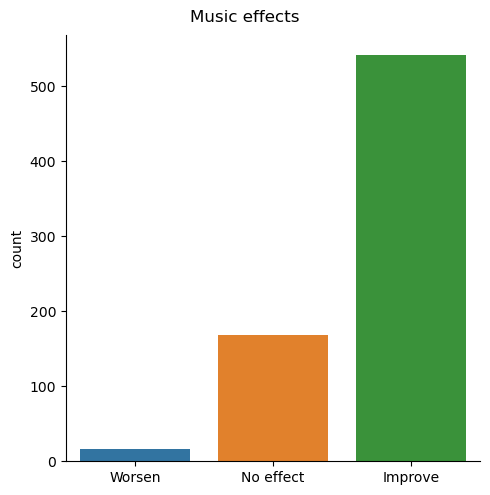

In [93]:
category_order = ['Worsen', 'No effect', 'Improve']

g = sns.catplot(x='Music effects', data=clean_survey_df, kind='count', order=category_order)
g.fig.suptitle('Music effects', y=1.02)
g.set(xlabel='')

plt.show()

In [96]:
# Since Music effects contains the most relevant data, we will just drop rows missing this value and confirm no missing values

clean_survey_df = clean_survey_df.dropna(subset=['Music effects'])

clean_survey_df['Music effects'].isna().sum()

0

In [117]:
# Convert to type 'category' and confirm

clean_survey_df['Music effects'] = clean_survey_df['Music effects'].astype('category')

clean_survey_df['Music effects'].dtype

CategoricalDtype(categories=['Improve', 'No effect', 'Worsen'], ordered=False, categories_dtype=object)

### Primary streaming service

In [102]:
# Solve missing value in Primary streaming service column

clean_survey_df['Primary streaming service'].isna().sum()

1

In [101]:
clean_survey_df[clean_survey_df['Primary streaming service'].isna()]

Date  Age Primary streaming service  Hours per day  While working  \
197 2022-08-28   21                       NaN            5.0           True   

     Instrumentalist  Composer Fav genre  Exploratory  Foreign languages  ...  \
197            False     False   Country         True              False  ...   

     Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
197            Never          Rarely  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia OCD  \
197                        Never       9          8        9   7   

    Music effects    Permissions  
197       Improve  I understand.  

[1 rows x 33 columns]

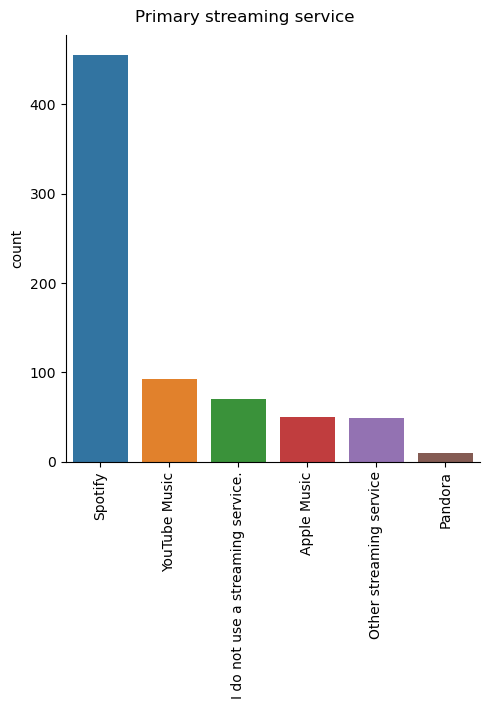

In [109]:
g = sns.catplot(x='Primary streaming service', data=clean_survey_df, kind='count')
plt.xticks(rotation=90)
g.set(xlabel='')
g.fig.suptitle('Primary streaming service', y=1.02)

plt.show()

In [112]:
# Impute missing value with mode

clean_survey_df['Primary streaming service'] = clean_survey_df['Primary streaming service'].fillna(clean_survey_df['Primary streaming service'].mode().iloc[0])

In [113]:
# Confirm imputation

clean_survey_df['Primary streaming service'].isna().sum()

0

### Permissions Column

In [120]:
# Since this column has one value and is irrelevant to our data, it will be dropped

clean_survey_df = clean_survey_df.drop('Permissions', axis=1)
clean_survey_df.columns

Index(['Date', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')